In [1]:
chat_id = '42478249'
TOKEN = '880339082:AAEa3xDy1tX5mWGja91s1BqO2Ydr6RQlX9Q'  # FIXME: 토큰 지정

In [4]:
import telegram
bot = telegram.Bot(token=TOKEN)
bot.send_message(chat_id=chat_id, text='안녕 ~~~ :D')

In [5]:
import requests
from bs4 import BeautifulSoup

def 네이버_실검():
    res = requests.get("http://naver.com")
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    tag_list = soup.select('.PM_CL_realtimeKeyword_rolling .ah_k')

    keyword_list = []
    for rank, tag in enumerate(tag_list, 1): # 항상 하위 block 전에 콤마(:)를 씁니다.
        keyword = tag.text
        keyword_list.append(keyword)

    return keyword_list

In [6]:
text = '\n'.join(네이버_실검())
bot.send_message(chat_id=chat_id, text=text)

In [7]:
def 네이버_블로그_검색(keyword):
    url = 'https://search.naver.com/search.naver'
    params = {
        'where': 'post',
        'sm': 'tab_jum',
        'query': keyword,
    }
    res = requests.get(url, params=params)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    
    post_list = []
    for tag in soup.select('.sh_blog_title'):
        title = tag.text
        url = tag['href']
        # TODO: 요약문, 대표이미지, 글쓴날짜
        post_list.append({
            'url': url,
            'title': title,
        })
    return post_list

In [17]:
line_list = []
for post in 네이버_블로그_검색('LS그룹'):
    line = '{}\n{}'.format(post['title'], post['url'])
    line_list.append(line)

text = '\n\n'.join(line_list)
bot.send_message(chat_id=chat_id, text=text)

In [35]:
# 블로그 검색:

# 네이버 블로그에서 맛집 검색해줘
# 네이버 블로그에서 맛집 검색해줄래?
# 네이버 블로그에서 맛집 검색해주지 않으련?
# 네이버 블로그에서 맛집 검색 고고
# 네이버 블로그 맛집 검색
# 블로그에서 맛집 검색

import re

네이버_블로그_검색_키워드_패턴 = r"블로그에?서?(.+)검색"

matched = re.search(네이버_블로그_검색_키워드_패턴, '네이버 블로그에서 LS 그룹 검색해줄래?')
if matched:
    print("네이버 블로그 검색을 시작합니다.")
#     검색어 = matched.groups()[0]
    검색어 = matched.group(1)
    print(검색어)

네이버 블로그 검색을 시작합니다.
 LS 그룹 


In [21]:
re.search(네이버_블로그_검색_키워드_패턴, '블로 맛집 검색해줄래?')

# Azure Cognitive Service

+ https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/overview
+ https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/tutorials/faceapiinpythontutorial

필요한 팩키지 : `pip install cognitive_face`

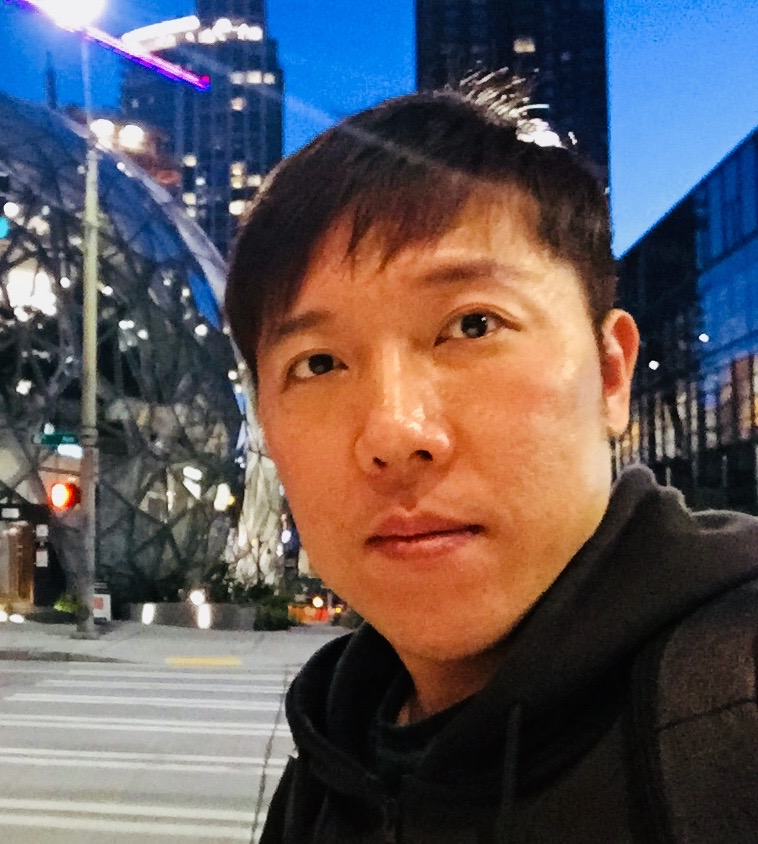

In [9]:
from IPython.display import Image

img_path = '/Users/allieus/Downloads/이진석-프로필-시애틀.jpeg'
Image(filename=img_path)

In [6]:
import cognitive_face as CF

KEY = 'dc92e69d27e8463e8becd3035dce9940'  # 강사 Key
CF.Key.set(KEY)

BASE_URL = 'https://koreacentral.api.cognitive.microsoft.com/face/v1.0/'  # Replace with your regional Base URL
CF.BaseUrl.set(BASE_URL)

# You can use this example JPG or replace the URL below with your own URL to a JPEG image.
# img_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
attributes = 'age,gender,smile,facialHair,headPose,glasses'
faces = CF.face.detect(img_path, attributes=attributes)
faces

[{'faceId': '85a0c6e7-ef5e-40ca-8494-f624b0acd92f',
  'faceRectangle': {'top': 243, 'left': 214, 'width': 389, 'height': 389},
  'faceAttributes': {'smile': 0.004,
   'headPose': {'pitch': 0.0, 'roll': -9.5, 'yaw': -20.6},
   'gender': 'male',
   'age': 28.0,
   'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1},
   'glasses': 'NoGlasses'}}]